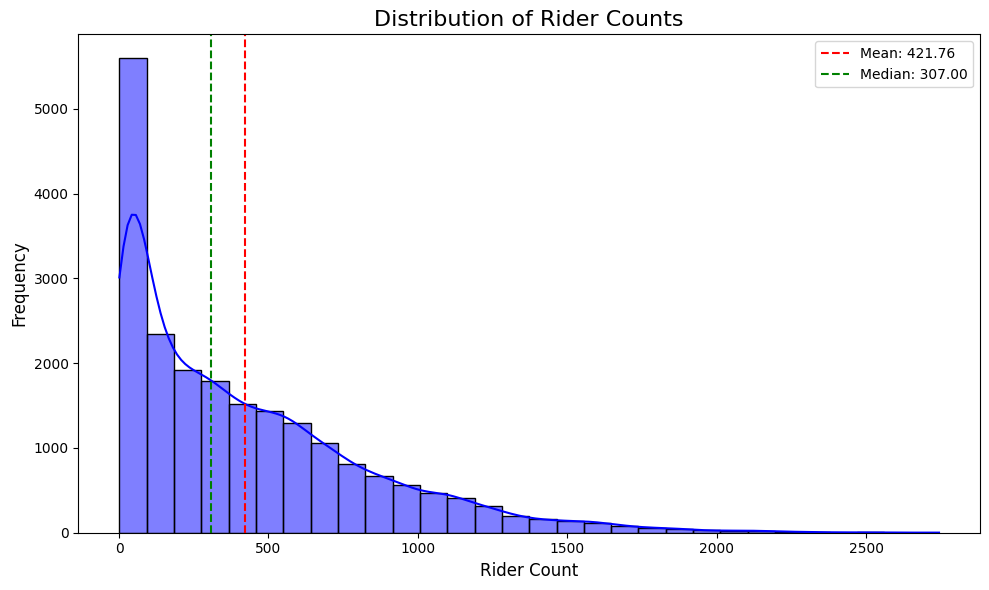

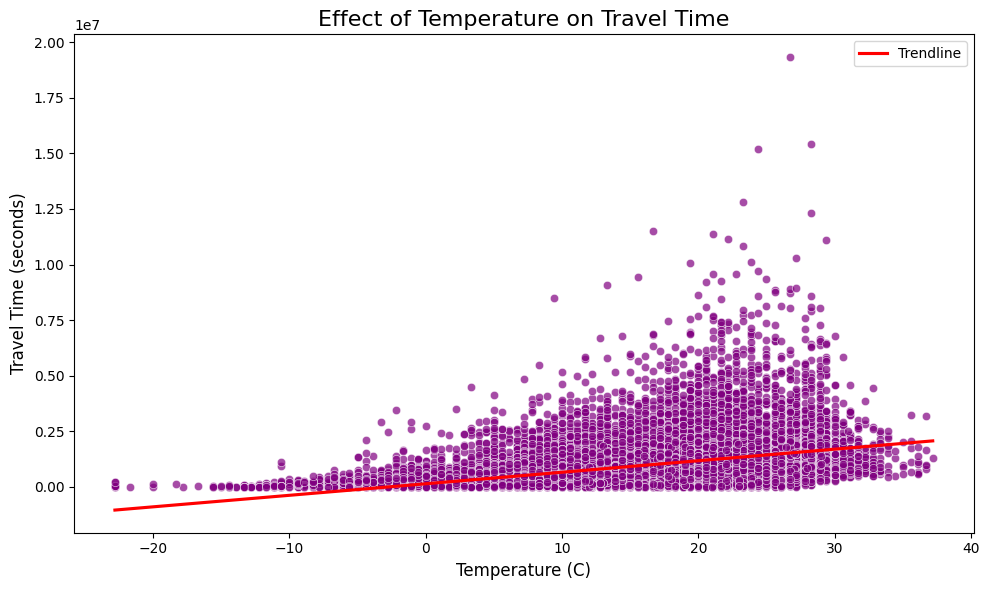

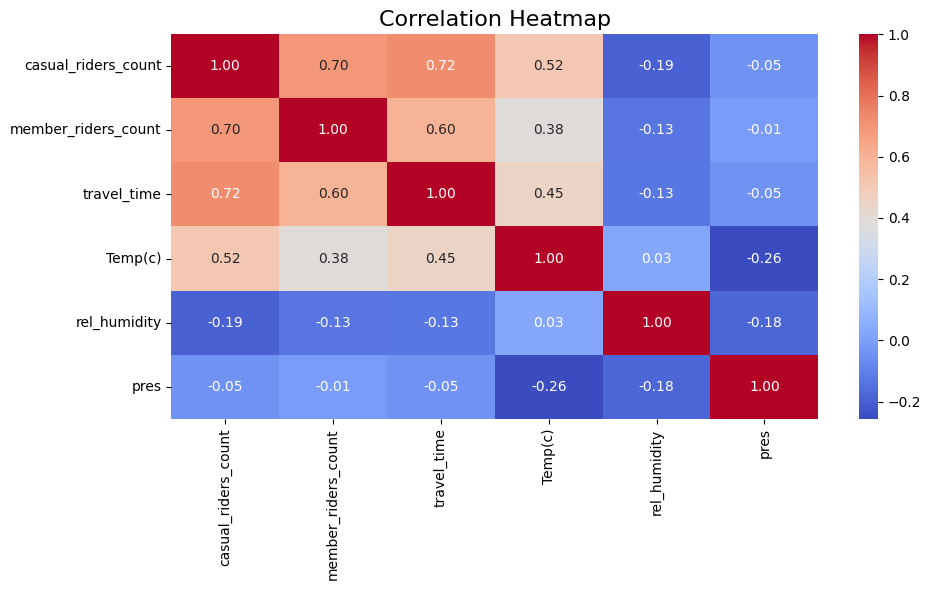

C:\Users\hp\AppData\Local\Temp\ipykernel_24496\2183392407.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x, y=y, palette="Set2")


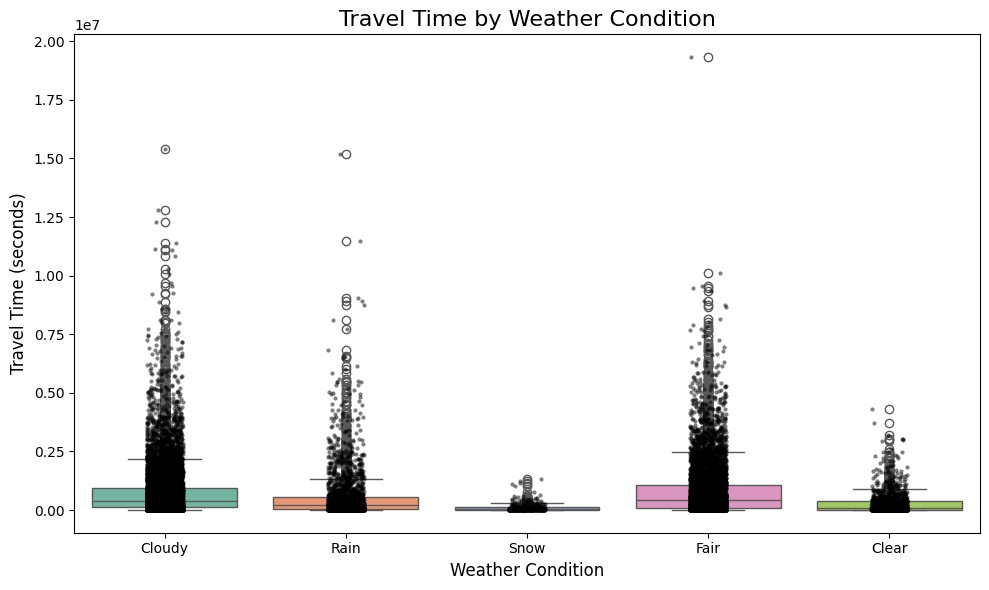

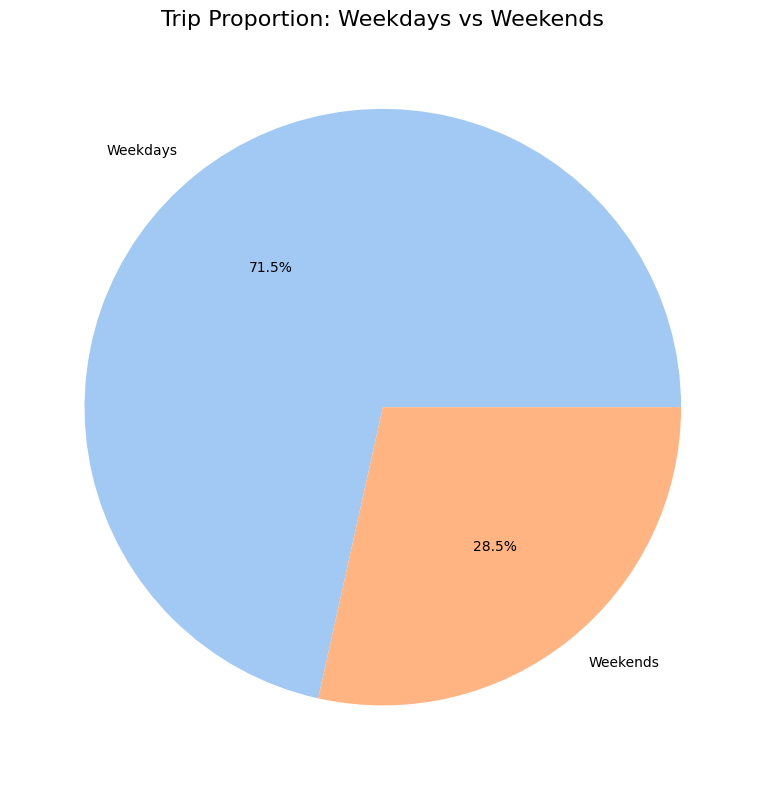

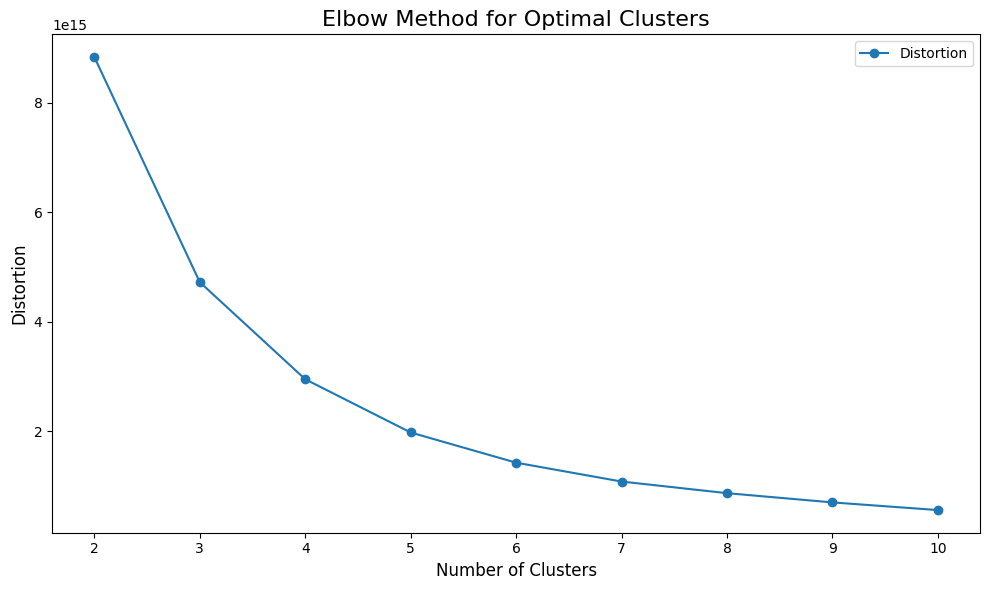

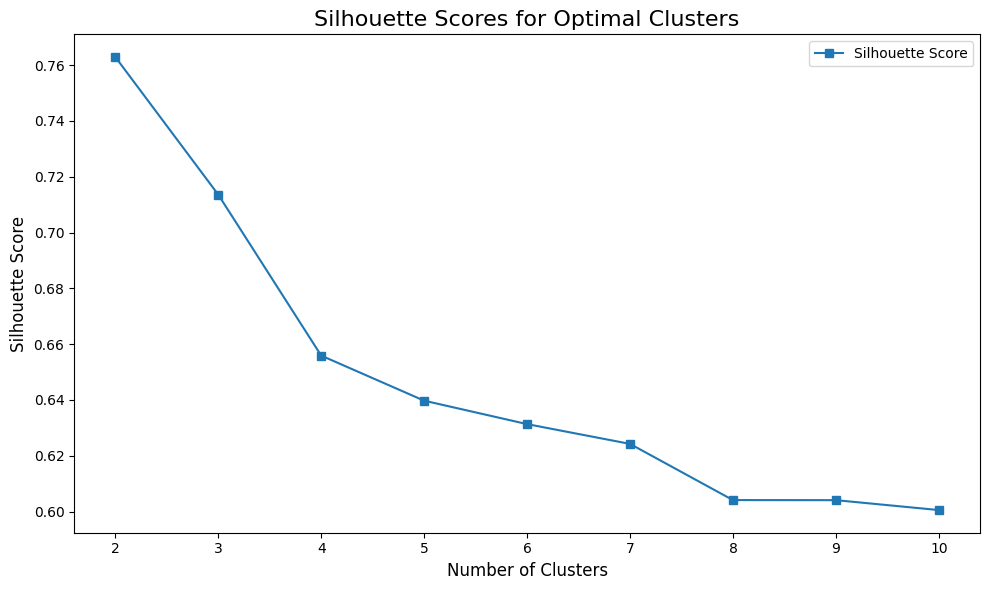

C:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


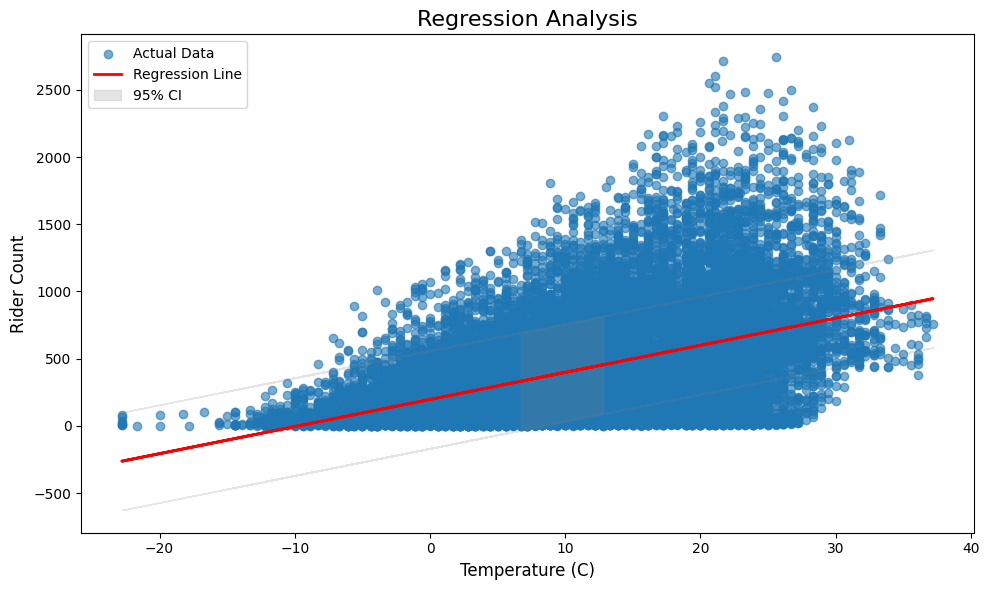

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score

# Load dataset
file_name = "bluebike.csv"  # Ensure the dataset is in the same directory
bluebike_data = pd.read_csv(file_name)

# Step 1: Data Cleaning and Preparation
def clean_data(df):
    """
    Cleans the dataset by handling missing values and formatting columns.
    """
    df.dropna(inplace=True)
    df['day_of_week'] = pd.Categorical(df['day_of_week'], 
                                       categories=['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY'], 
                                       ordered=True)
    return df

bluebike_data = clean_data(bluebike_data)

# Step 2: Histogram
def create_histogram(data, xlabel, ylabel, title):
    """
    Creates a histogram to analyze the distribution of a dataset.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, bins=30, color='blue')
    plt.axvline(data.mean(), color='red', linestyle='--', label=f'Mean: {data.mean():.2f}')
    plt.axvline(data.median(), color='green', linestyle='--', label=f'Median: {data.median():.2f}')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example: Rider Count Distribution
create_histogram(bluebike_data['count'], "Rider Count", "Frequency", "Distribution of Rider Counts")

# Step 3: Scatter Plot
def create_scatter_plot(x, y, xlabel, ylabel, title):
    """
    Creates a scatter plot with a regression trendline.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, alpha=0.7, color='purple')
    sns.regplot(x=x, y=y, scatter=False, color='red', ci=None, label="Trendline")
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example: Travel Time vs Temperature
create_scatter_plot(bluebike_data['Temp(c)'], bluebike_data['travel_time'], 
                    "Temperature (C)", "Travel Time (seconds)", "Effect of Temperature on Travel Time")

# Step 4: Heatmap
def create_heatmap(df, title):
    """
    Creates a heatmap to visualize correlations between numerical features.
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Example: Heatmap of Correlations
numerical_columns = ['casual_riders_count', 'member_riders_count', 'travel_time', 'Temp(c)', 'rel_humidity', 'pres']
create_heatmap(bluebike_data[numerical_columns], "Correlation Heatmap")

# Step 5: Box Plot
def create_box_plot(x, y, xlabel, ylabel, title):
    """
    Creates a box plot to analyze data distribution by category.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, palette="Set2")
    sns.stripplot(x=x, y=y, color="black", alpha=0.5, jitter=True, size=3)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Example: Travel Time by Weather Condition
create_box_plot(bluebike_data['weather_condition'], bluebike_data['travel_time'], 
                "Weather Condition", "Travel Time (seconds)", "Travel Time by Weather Condition")

# Step 6: Pie Chart
def create_pie_chart(df, column, labels, title):
    """
    Creates a pie chart to show proportions in a categorical dataset.
    """
    counts = df[column].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Example: Proportion of Weekends vs Weekdays
create_pie_chart(bluebike_data, 'IsWeekend', ['Weekdays', 'Weekends'], "Trip Proportion: Weekdays vs Weekends")

# Step 7: Elbow and Silhouette Plot
def create_elbow_and_silhouette_plot(data, max_clusters=10):
    """
    Creates an elbow plot and silhouette plot to find the optimal number of clusters.
    """
    distortions = []
    silhouettes = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(data, kmeans.labels_))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), distortions, marker='o', label="Distortion")
    plt.xlabel("Number of Clusters", fontsize=12)
    plt.ylabel("Distortion", fontsize=12)
    plt.title("Elbow Method for Optimal Clusters", fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouettes, marker='s', label="Silhouette Score")
    plt.xlabel("Number of Clusters", fontsize=12)
    plt.ylabel("Silhouette Score", fontsize=12)
    plt.title("Silhouette Scores for Optimal Clusters", fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example: Clustering
cluster_data = bluebike_data[['Temp(c)', 'count', 'travel_time']]
create_elbow_and_silhouette_plot(cluster_data)

# Step 8: Regression Analysis
def perform_regression(x, y):
    """
    Fits a linear regression model.
    """
    model = LinearRegression()
    model.fit(x, y)
    return model

x = bluebike_data[['Temp(c)']]
y = bluebike_data['count']
reg_model = perform_regression(x, y)

def plot_regression_results(x, y, model, xlabel, ylabel, title):
    """
    Visualizes regression results with confidence intervals.
    """
    x = x.to_numpy().flatten()
    predictions = model.predict(x.reshape(-1, 1))
    lower_bound = predictions - 1.96 * np.std(predictions)
    upper_bound = predictions + 1.96 * np.std(predictions)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Actual Data", alpha=0.6)
    plt.plot(x, predictions, color="red", label="Regression Line", linewidth=2)
    plt.fill_between(x, lower_bound, upper_bound, color='gray', alpha=0.2, label="95% CI")
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example: Regression Results Visualization
plot_regression_results(x, y, reg_model, "Temperature (C)", "Rider Count", "Regression Analysis")
